# Linear Model for Regression

Topik ini pasti sudah sangat familiar bagi Anda, apalagi buat Anda yang memiliki background ilmu Statistika.
Pada bagian ini kita hanya akan fokus pada linear model pada kasus regresi, dan bagaimana implementasinya di Python.

Sebagai contoh, kita mempunyai data dummy sebagai berikut:

[342 384 295 293 347 460 420 453 465 312 179 409 462 276 481 382 335 271
 422 269]
[213 330 150 162 187 268 300 295 302 167 161 226 327 219 335 251 203 152
 259 150]


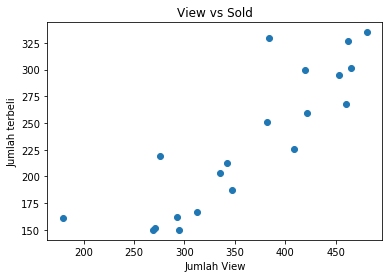

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# script untuk generate data dummy
# variabel view (independen)
# variabel sold (dependen)
view = np.random.randint(150, 500, 20, dtype=np.int)
sold = np.random.normal(view * 0.65 + 10, 45).astype(np.int)

print(view)
print(sold)


# menampilkan data dengan scatter plot
plt.scatter(view, sold)
plt.title("View vs Sold")
plt.xlabel("Jumlah View")
plt.ylabel("Jumlah terbeli")
plt.show()

Data tersebut terdiri dari 2 variabel.
Kolom pertama sebagai variabel independen dan kolom kedua sebagai variabel yang nilainya akan kita prediksi berdasarkan inputan nilai variabel independen.

Pada kasus nyata, kita tidak tahu relasi sebenernya antar variabel, apakah linear atau non linear.
Untuk contoh kasus ini, asumsi Anda meyakini bahwa kedua variabel tersebut memiliki relasi linear (dan memang seperti itu).
Kita akan mencoba memodelkan kedua variabel tersebut dengan linear model.

$$
\begin{aligned}
y & = w_0 + w_1 x + \epsilon \\
\mathbf{y} & = \mathbf{X} \mathbf{w} + \mathbf{\epsilon}
\end{aligned}
$$

dimana:
- $y$ adalah variabel `sold`.
- $x$ adalah variabel `view`.
- dan $\epsilon$ adalah random error merepresentasikan faktor2 lain yang tidak dipertimbahkan dalam simmpel model ini.

Idenya adalah, jika mengetahui nilai vektor $\mathbf{w}$, maka kita bisa menghitung prediksi nilai $y$ jika diberikan nilai input $x$.

**Lalu bagaimana kita mencari nilai vektor `w`?**

Pada umumnya, paradigma yang dilakukan dalam aplikasi machine learning adalah sebagai berikut:
1. Pengumpulan data
2. Mendefinisikan cost function
3. Membangun algoritma yang mampu meminimalkan fungsi cost tersebut

Hal ini juga bisa kita terapkan dalam kasus yang kita hadapi sekarang.
Berapapun nilai dari vektor $\mathbf{w}$ akan memberikan hasil prediksi $y$.
Jadi kita bisa saja menggunakan nilai random untuk mengisi vektor $\mathbf{w}$.
Yang sebenarnya ingin kita ketahui adalah seberapa akurat hasil prediksi kita jika diberikan nilai vektor $\mathbf{w}$. 
Atau lebih spesifiknya, kita perlu menghitung total error yang dihasilkan dari seluruh pasangan input-output.

Fungsi cost yang bisa kita gunakan dalam kasus ini adalah Sum Squared Error (SSE).

$$
\begin{aligned}
\text{SSE} & = \sum (t_i - y_i)^2 \\
\end{aligned}
$$

Idealnya, kita menginginkan error yang didapat sekecil mungkin.
Sehingga kita akan mendapatkan nilai vektor $\mathbf{w}$ yang optimum.

Setelah kita memiliki fungsi cost, langkah selanjutnya adalah kita merumuskan algoritma yang bisa meminimalkan fungsi cost tersebut.
Dengan bantuan Aljabar Linear, kita bisa lakukan dengan mencari persamaan turunan terhadap variabel `w` kemudian set nilai persamaan tersebut `= 0`.
Maka kita bisa mendapatkan analytical solution nilai `w` yang optimal.
Yaitu,

$$
\mathbf{w} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{t}
$$

Jika anda tertarik pada detail langkah - langkah penurunan fungsinya, anda bisa merujuk pada tautan berikut [https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)](https://en.wikipedia.org/wiki/Linear_least_squares)

## Linear Regression di Scikit Learn

Scikit-learn telah menyediakan modul untuk standar linear regression.
Detailnya dapat dilihat di tautan berikut ini [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

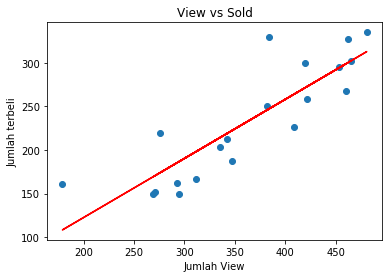

In [4]:
from sklearn.linear_model import LinearRegression


# instansiasi model linear regression
# dengan menggunakan default parameter
linreg = LinearRegression()


# menghitung nilai optimum vektor w
# dengan metode ordinary least squares
# seperti yang telah kita bahas di atas
# .reshape(-1, 1) transform 1D array ke 2D array
# jumlah baris x 1 kolom
linreg.fit(view.reshape(-1, 1), sold)

# menghitung hasil prediksi
y = linreg.predict(view.reshape(-1, 1))


# menampilkan hasil prediksi
plt.scatter(view, sold)
plt.plot(view, y, color="red")
plt.title("View vs Sold")
plt.xlabel("Jumlah View")
plt.ylabel("Jumlah terbeli")
plt.show()

In [5]:
# untuk menampilkan model yang dihasilkan
# nilai optimum vektor w
print("Koefisien w_1 ...:", linreg.coef_)
print("Intercept (w_0):", linreg.intercept_)

Koefisien w_1 ...: [0.67701606]
Intercept (w_0): -12.805276741541405


In [6]:
# untuk menghitung squared error
np.square(y - sold).sum()

21305.305010494583

## Quiz

Apa yang dilakukan oleh modul `LinearRegression` di scikit-learn adalah sebenarnya melakukan operasi $\mathbf{w} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{t}$, untuk mendapatkan nilai vektor $\mathbf{w}$.
Menurut Anda, apa kelemahan dari metode tersebut? dan adakah hubungannya dengan jumlah data yang diproses?


